In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import warnings
from statsbombpy.api_client import NoAuthWarning
warnings.simplefilter('ignore', NoAuthWarning)
from socceraction.data.statsbomb import StatsBombLoader
import socceraction.spadl as spadl

api = StatsBombLoader(getter="remote", creds={"user": "", "passwd": ""})

g = 18240
team_id = 169
df_teams = api.teams(game_id=g)
df_players = api.players(game_id=g)
df_events = api.events(game_id=g)

df_actions = spadl.statsbomb.convert_to_actions(df_events, home_team_id=team_id)
df_actions = (
spadl
.add_names(df_actions)
.merge(api.teams(game_id=g))
.merge(api.players(game_id=g))
)
df_actions = df_actions.sort_values(by=['period_id', 'time_seconds'], ascending=[True, True]).reset_index(drop=True)

In [3]:
df_actions.columns

Index(['game_id', 'original_event_id', 'period_id', 'time_seconds', 'team_id',
       'player_id', 'start_x', 'start_y', 'end_x', 'end_y', 'type_id',
       'result_id', 'bodypart_id', 'action_id', 'type_name', 'result_name',
       'bodypart_name', 'team_name', 'player_name', 'nickname',
       'jersey_number', 'is_starter', 'starting_position_id',
       'starting_position_name', 'minutes_played'],
      dtype='object')

In [4]:
df_actions.columns

Index(['game_id', 'original_event_id', 'period_id', 'time_seconds', 'team_id',
       'player_id', 'start_x', 'start_y', 'end_x', 'end_y', 'type_id',
       'result_id', 'bodypart_id', 'action_id', 'type_name', 'result_name',
       'bodypart_name', 'team_name', 'player_name', 'nickname',
       'jersey_number', 'is_starter', 'starting_position_id',
       'starting_position_name', 'minutes_played'],
      dtype='object')

game_id    original_event_id             period_id    time_seconds    team_id
---------  ----------------------------  -----------  --------------  -------------
0m13s      David Olatukunbo Alaba        pass         success         Bayern Munich
0m14s      Dante Bonfim da Costa Santos  dribble      success         Bayern Munich
0m17s      Dante Bonfim da Costa Santos  pass         success         Bayern Munich
0m19s      Manuel Neuer                  dribble      success         Bayern Munich
0m21s      Manuel Neuer                  pass         success         Bayern Munich
0m23s      Dante Bonfim da Costa Santos  dribble      success         Bayern Munich
0m26s      Dante Bonfim da Costa Santos  pass         success         Bayern Munich
0m27s      Bastian Schweinsteiger        dribble      success         Bayern Munich
0m31s      Bastian Schweinsteiger        pass         success         Bayern Munich
0m34s      Jérôme Boateng                dribble      success         Bayern Munic

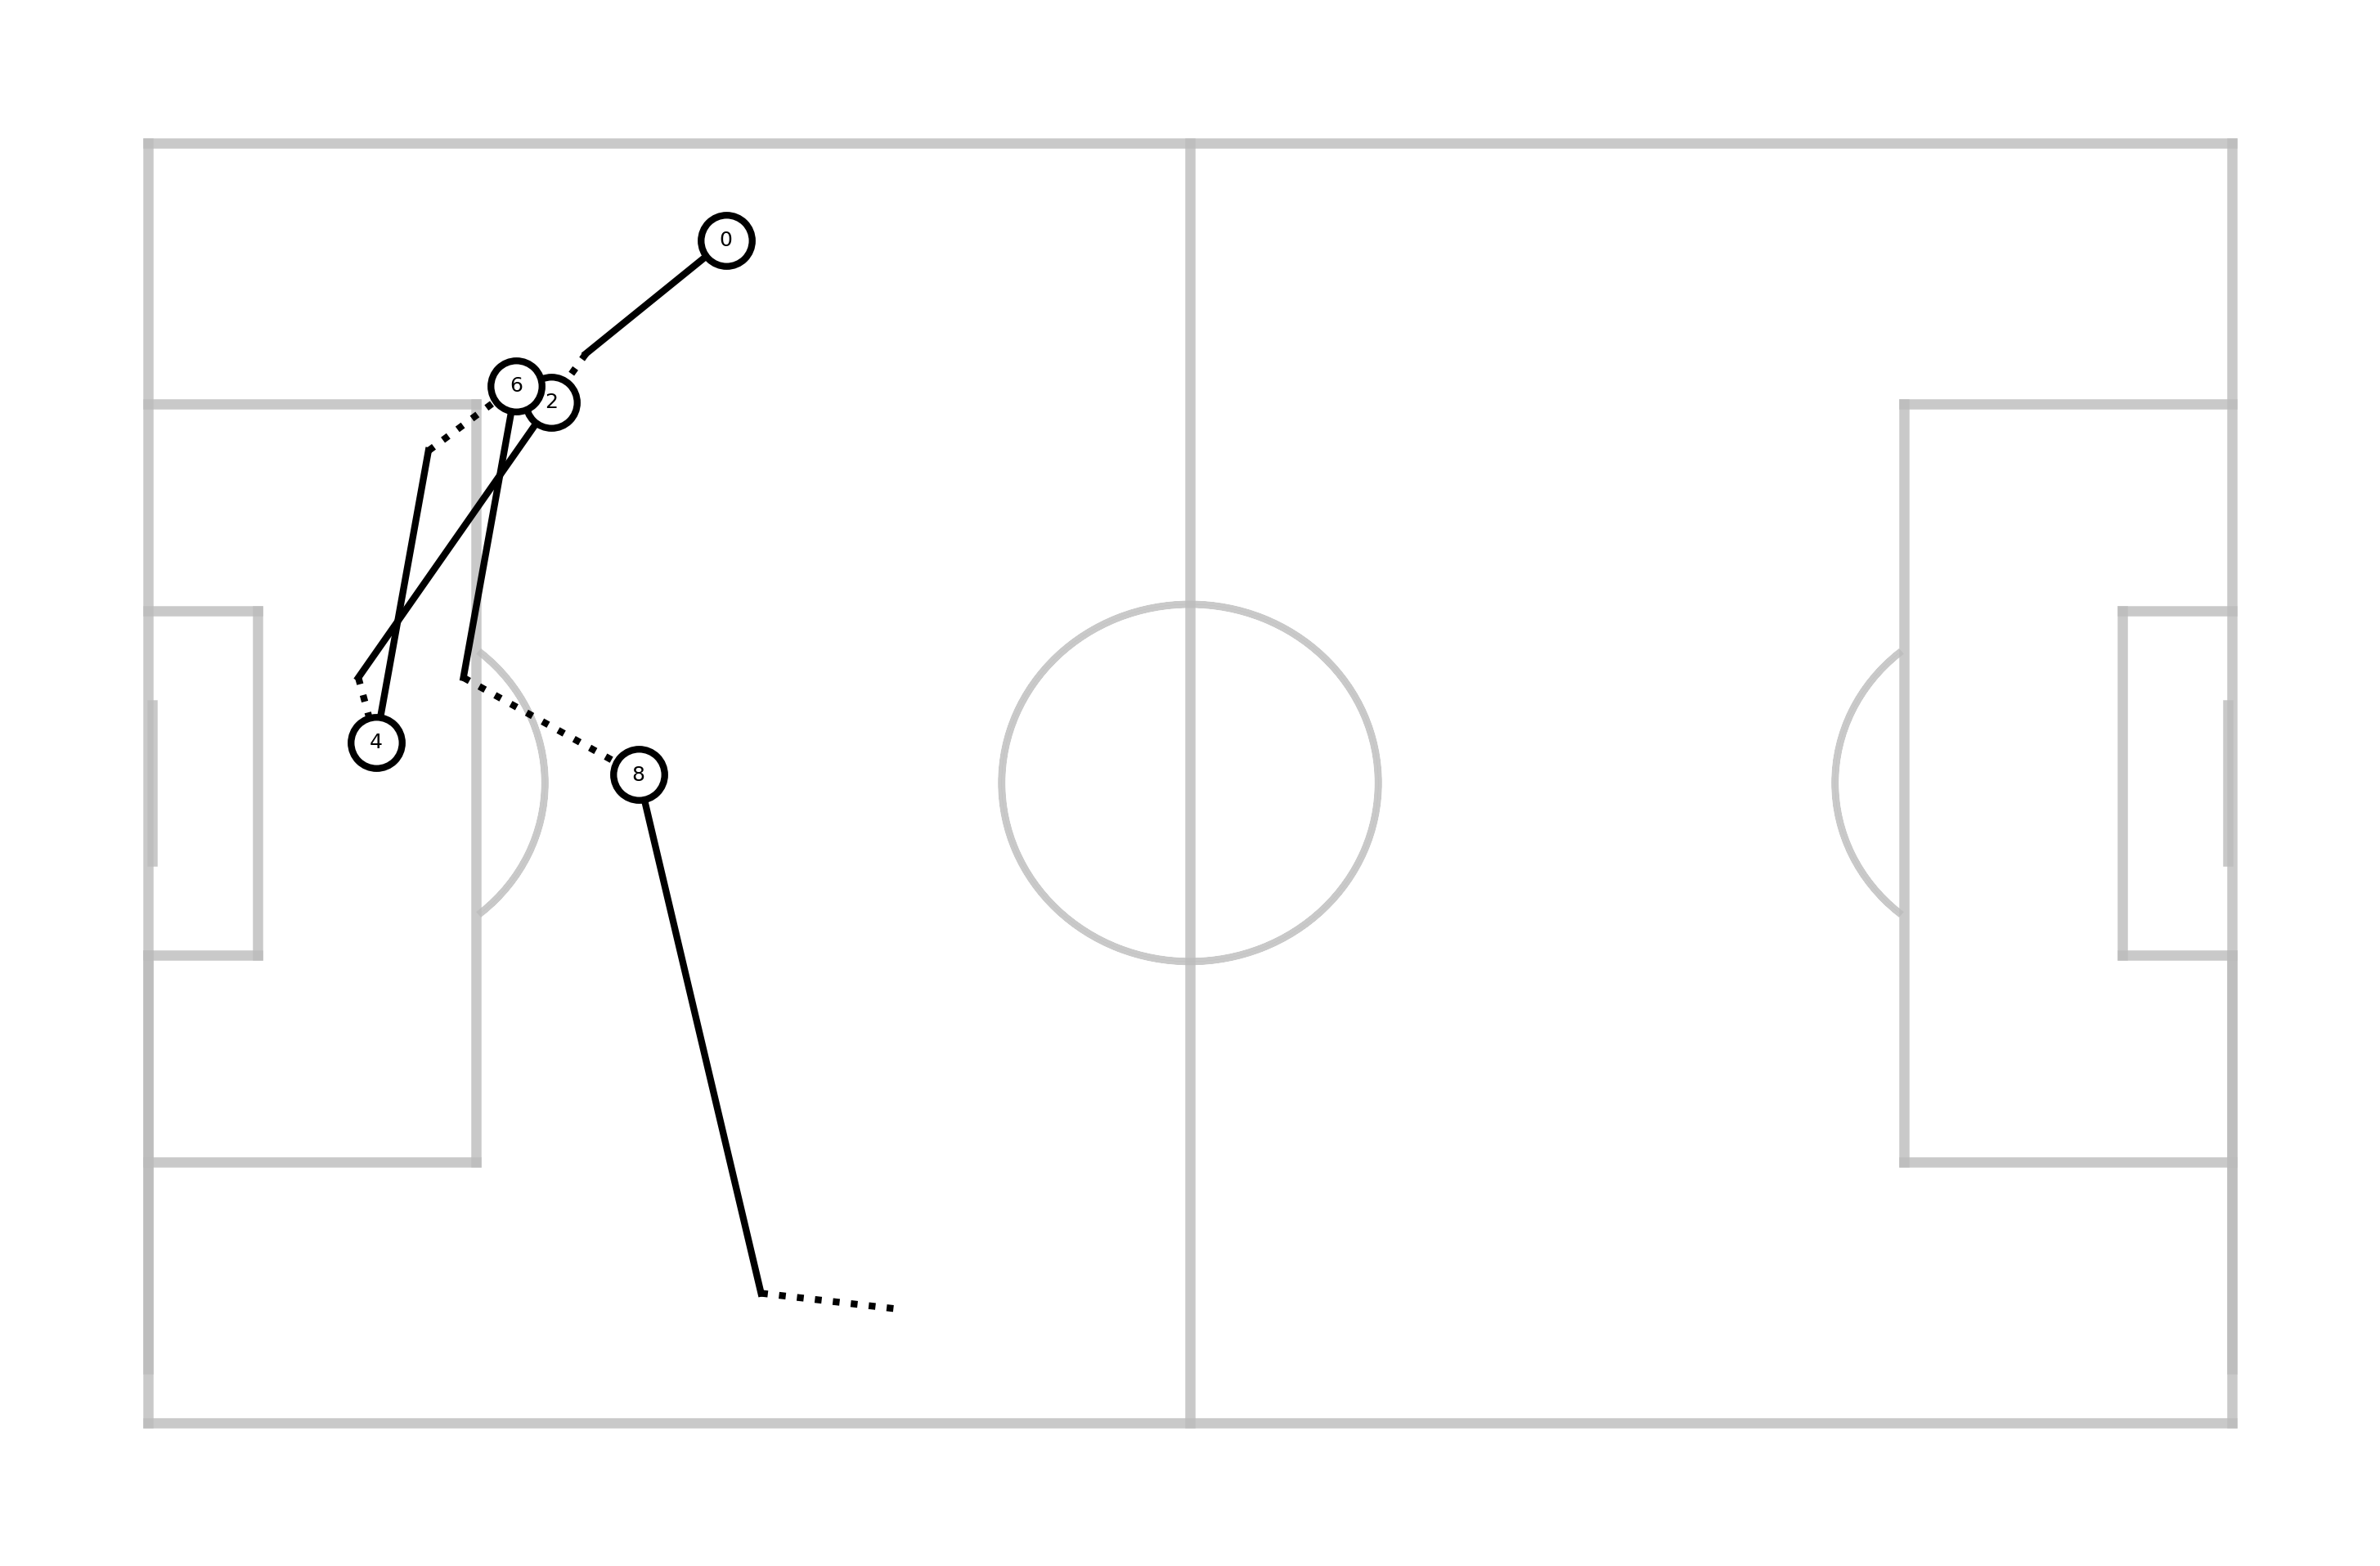

In [5]:
import statsbombplot as pys
from tabulate import tabulate

def nice_time(row):
    minute = int((row.period_id-1)*45 +row.time_seconds // 60)
    second = int(row.time_seconds % 60)
    return f"{minute}m{second}s"

def find_goal(df):
    df = df[(df['type_id'] == 11) & (df['result_id'] == 1)]
    return df.index

# goals = list(find_goal(df_actions))
# starting_id = goals[0]
# df = df_actions[starting_id - 9: starting_id + 1].copy()
df = df_actions[10:20].copy()
df = df.reset_index(drop=True)

pys.draw_actions(df)

df["nice_time"] = df.apply(nice_time, axis=1)

print(tabulate(df[['nice_time', 'player_name', 'type_name', 'result_name', 'team_name']], headers = df.columns, showindex=False))

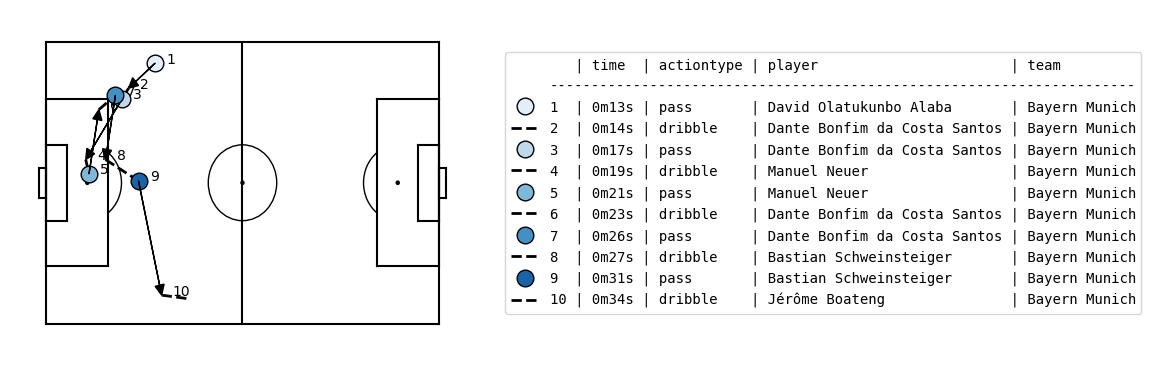

In [6]:
import matplotsoccer

labels = df[["nice_time", "type_name", "player_name", "team_name"]]

ax = matplotsoccer.actions(
        location=df[["start_x", "start_y", "end_x", "end_y"]],
        action_type=df.type_name,
        team= df.team_name,
        result= df.result_name == "success",
        label=labels,
        labeltitle=["time", "actiontype", "player", "team"],
        zoom=False,
        figsize=6
    )